# Contents
- [EDA](#eda)  
- [Preprocessing](#prepro)  
    - [Test/Train Split](#tt_splt)  
    - [Standardize Data](#std)  
    - [Normalize Data](#norm)
    - [Polynomial Transformation](#poly)  
    - [Logarithmic Transformation](#log)
    - [Categorical Data](#cat)
- [Linear Regression Modeling](#model)
    - [Cross Validation](#crs_val)  
    - [Model Evaluation](#eval)  
    - [Feature Selection](#feat_sel)
- [Refined Modeling](#ref_mod)
    - [Pipeline](#pipe)  
    - [Regularization](#reg)
    - [Feature Importance](#feat_imp)

# Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA <a name="eda"></a>

## Load Data

In [2]:
df_conc = pd.read_csv('data/Concrete_Data.csv')

In [3]:
df_conc.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df = df_conc[['Cement (component 1)(kg in a m^3 mixture)', 
              'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']]
df.columns=['Cement', 'Age', 'Strength']

In [5]:
df.head()

,Cement,Age,Strength
0,540.0,28,79.99
1,540.0,28,61.89
2,332.5,270,40.27
3,332.5,365,41.05
4,198.6,360,44.30


In [6]:
# plotting variables
x_1 = df.iloc[:, 0]
x_1_label = df.columns[0]
x_2 = df.iloc[:, 1]
x_2_label = df.columns[1]
y = df.iloc[:, -1]
y_label = df.columns[-1]

## Plot Variable Distributions
Determine if variables are normally distributed

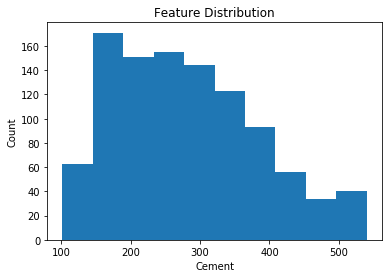

In [7]:
plt.hist(x_1)
plt.xlabel(x_1_label)
plt.ylabel('Count')
plt.title('Feature Distribution');

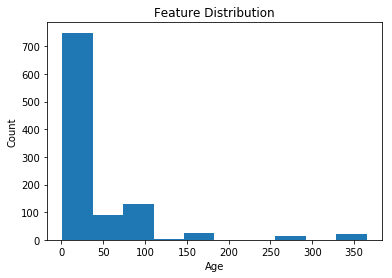

In [8]:
plt.hist(x_2)
plt.xlabel(x_2_label)
plt.ylabel('Count')
plt.title('Feature Distribution');

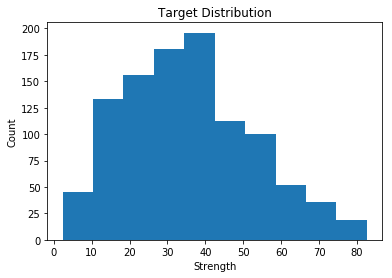

In [9]:
plt.hist(y)
plt.xlabel(y_label)
plt.ylabel('Count')
plt.title('Target Distribution');

## Feature Relationship
Determine if colinearity exists between features

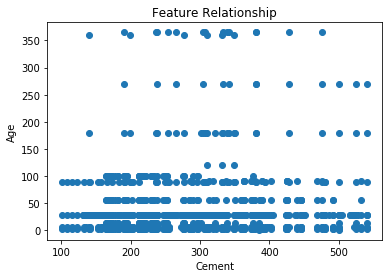

In [10]:
plt.scatter(x_1, x_2)
plt.xlabel(x_1_label)
plt.ylabel(x_2_label)
plt.title('Feature Relationship');

## Plot Features vs Target
Investigate relationship of individual features with target variable

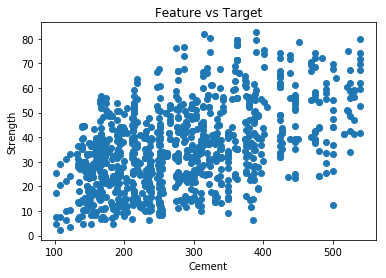

In [11]:
plt.scatter(x_1, y)
plt.xlabel(x_1_label)
plt.ylabel(y_label)
plt.title('Feature vs Target');

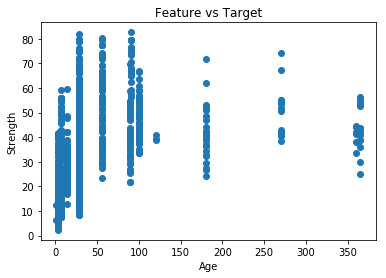

In [12]:
plt.scatter(x_2, y)
plt.xlabel(x_2_label)
plt.ylabel(y_label)
plt.title('Feature vs Target');

### 3D Plot

In [13]:
from mpl_toolkits import mplot3d

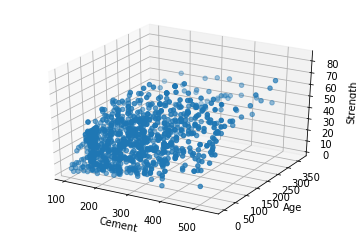

In [14]:
# uncomment for interactivity:
# %matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, y)
ax.set_xlabel(x_1_label)
ax.set_ylabel(x_2_label)
ax.set_zlabel(y_label);

In [15]:
%matplotlib inline

# Preprocessing <a name="prepro"></a>

## Define Variables

In [16]:
# independent (feature) variables
X = df.iloc[:, 0:-1]

In [17]:
# dependent (target) variable
y = df.iloc[:, -1]

## Test/Train Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,Cement,Age
995,158.6,28
507,424.0,28
334,275.1,3
848,252.0,28
294,168.9,3


In [21]:
y_train.head()

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
Name: Strength, dtype: float64

In [22]:
X_test.head()

,Cement,Age
31,266.0,365
109,362.6,7
136,389.9,28
88,362.6,3
918,145.0,28


In [23]:
y_test.head()

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
Name: Strength, dtype: float64

## Standardize Data <a name="std"></a>
For each feature, subtract mean and then divide by standard deviation

In [24]:
X_train_std = pd.DataFrame()

for feature in X_train.columns:
    X_train_mean = np.mean(X_train[feature])
    X_train_sigma = np.std(X_train[feature])
    X_train_std[feature] = (X_train[feature] - X_train_mean) / X_train_sigma

In [25]:
X_train_std.head()

,Cement,Age
995,-1.160877,-0.275673
507,1.308623,-0.275673
334,-0.076865,-0.689313
848,-0.291807,-0.275673
294,-1.065038,-0.689313


### StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# create instance of scaler
std_scaler = StandardScaler()

In [28]:
# fit scaler to training feature data
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
# apply scaler to feature data
std_scaler.transform(X_train)[0:5]

array([[-1.16087734, -0.27567315],
       [ 1.30862304, -0.27567315],
       [-0.0768653 , -0.68931339],
       [-0.29180674, -0.27567315],
       [-1.06503765, -0.68931339]])

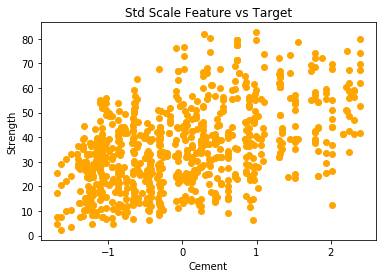

In [30]:
plt.scatter([feature[0] for feature in std_scaler.transform(X_train)], y_train.values, c='orange')
plt.title('Std Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

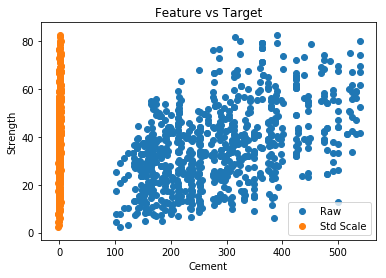

In [31]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter([feature[0] for feature in std_scaler.transform(X_train)], y_train, label='Std Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

### Apply to Data

In [32]:
# fit and apply to training data
X_train_std = std_scaler.fit_transform(X_train)

In [33]:
# apply to test data
X_test_std = std_scaler.transform(X_test)

## Normalize Data <a name="norm"></a>
For each feature, subtract minimum and then divide by difference between maximum and minimum  
Scaled values are between 0 and 1

In [34]:
X_train_norm = pd.DataFrame()

for feature in X.columns:
    X_train_min = min(X_train[feature])
    X_train_max = max(X_train[feature])
    X_train_norm[feature] = (X_train[feature] - X_train_min) / (X_train_max - X_train_min)

In [35]:
X_train_norm.head()

,Cement,Age
995,0.129224,0.074176
507,0.735160,0.074176
334,0.395205,0.005495
848,0.342466,0.074176
294,0.152740,0.005495


### MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# create instance of scaler
norm_scaler = MinMaxScaler()

In [38]:
# fit scaler to training feature data
norm_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
# apply scaler to training feature data
norm_scaler.transform(X_train)[0:5]

array([[0.12922374, 0.07417582],
       [0.73515982, 0.07417582],
       [0.39520548, 0.00549451],
       [0.34246575, 0.07417582],
       [0.15273973, 0.00549451]])

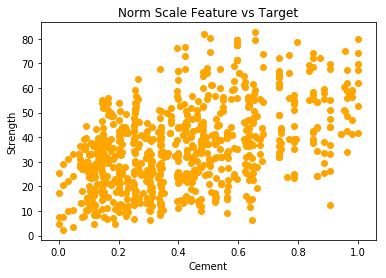

In [40]:
plt.scatter([feature[0] for feature in norm_scaler.transform(X_train)], y_train, c='orange')
plt.title('Norm Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

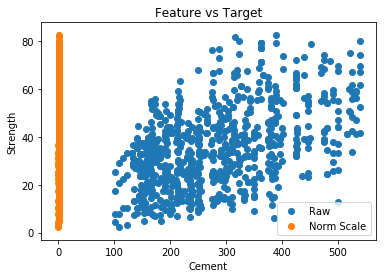

In [41]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter([feature[0] for feature in norm_scaler.transform(X_train)], y_train, label='Norm Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

### Apply to Data

In [42]:
# fit and apply to training data
X_train_norm = norm_scaler.fit_transform(X_train)

In [43]:
# apply to test data
X_test_norm = norm_scaler.transform(X_test)

## Polynomial Transformation <a name="poly"></a>
Create polynomial interaction of features for model

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
# create instance of polynomial features, specify degree
poly = PolynomialFeatures(degree=2)

In [46]:
# fit scaler to training feature data
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [47]:
# apply to training feature data, creates new features
poly.transform(X_train)[0:5]

array([[1.000000e+00, 1.586000e+02, 2.800000e+01, 2.515396e+04,
        4.440800e+03, 7.840000e+02],
       [1.000000e+00, 4.240000e+02, 2.800000e+01, 1.797760e+05,
        1.187200e+04, 7.840000e+02],
       [1.000000e+00, 2.751000e+02, 3.000000e+00, 7.568001e+04,
        8.253000e+02, 9.000000e+00],
       [1.000000e+00, 2.520000e+02, 2.800000e+01, 6.350400e+04,
        7.056000e+03, 7.840000e+02],
       [1.000000e+00, 1.689000e+02, 3.000000e+00, 2.852721e+04,
        5.067000e+02, 9.000000e+00]])

In [48]:
# output features
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [49]:
# output features mapped to dataframe columns
poly.get_feature_names(input_features=X_train.columns)

['1', 'Cement', 'Age', 'Cement^2', 'Cement Age', 'Age^2']

In [50]:
# polynomial features dataframe
df_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names(input_features=X_train.columns))
df_poly.head()

,1,Cement,Age,Cement^2,Cement Age,Age^2
0,1.0,158.6,28.0,25153.96,4440.8,784.0
1,1.0,424.0,28.0,179776.00,11872.0,784.0
2,1.0,275.1,3.0,75680.01,825.3,9.0
3,1.0,252.0,28.0,63504.00,7056.0,784.0
4,1.0,168.9,3.0,28527.21,506.7,9.0


### Apply to Data

In [51]:
# fit and apply to training data
X_train_poly = poly.fit_transform(X_train)

In [52]:
# apply to test data
X_test_poly = poly.transform(X_test)

## Logarithmic Transformation <a name="log"></a>
Transform data into natural log scale

In [53]:
# transform training feature values to natural log scale
X_train_ln = np.log(X_train)
X_train_ln.head()

,Cement,Age
995,5.066385,3.332205
507,6.049733,3.332205
334,5.617135,1.098612
848,5.529429,3.332205
294,5.129307,1.098612


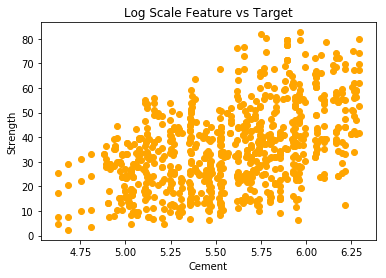

In [54]:
plt.scatter(X_train_ln.iloc[:, 0], y_train, c='orange')
plt.title('Log Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

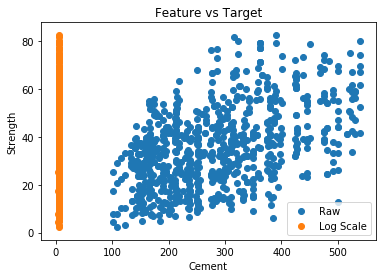

In [55]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter(X_train_ln.iloc[:, 0], y_train, label='Log Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

In [56]:
# transform test feature values to natural log scale
X_test_ln = np.log(X_test)

## Categorical Data <a name="cat"></a>
Convert non-numerical data to numerical encoding

### One-Hot Encoding

In [57]:
# create categorical feature
df_cat = df.copy()
group_set = ['red', 'blue', 'gray']
group = random.choices(group_set, k=len(df_conc))
df_cat.insert(2, 'Category', group)
df_cat.head()

,Cement,Age,Category,Strength
0,540.0,28,gray,79.99
1,540.0,28,blue,61.89
2,332.5,270,blue,40.27
3,332.5,365,red,41.05
4,198.6,360,blue,44.30


In [58]:
# one-hot encoding of categorical variables
pd.get_dummies(df_cat['Category']).head()

,blue,gray,red
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


# Linear Regression Modeling <a name="model"></a>

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
# create instance of linear regression model
lin_reg = LinearRegression()

In [61]:
# fit model on training data
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
# output model coefficients
lin_reg.coef_

array([0.07351341, 0.07984872])

In [63]:
# output model intercept
lin_reg.intercept_

11.460889597721213

In [64]:
# features
X.columns

Index(['Cement', 'Age'], dtype='object')

In [65]:
coefs = [lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1]]

In [66]:
feats = ['intercept', X.columns[0], X.columns[1]]

In [67]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,11.460890
Cement,0.073513
Age,0.079849


### Model Equation

In [68]:
print('Linear Regression Model')
print('-'*80)
print(f'y = {round(lin_reg.coef_[0], 4)}*{X.columns[0]} \
+ {round(lin_reg.coef_[1], 4)}*{X.columns[1]} + {round(lin_reg.intercept_, 2)}')
print('-'*80)

Linear Regression Model
--------------------------------------------------------------------------------
y = 0.0735*Cement + 0.0798*Age + 11.46
--------------------------------------------------------------------------------


### Model Vizualization

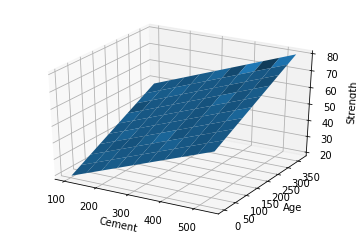

In [69]:
# uncomment for interactivity:
# %matplotlib notebook

x1_lim = np.linspace(min(x_1), max(x_1), 10)
x2_lim = np.linspace(min(x_2), max(x_2), 10)

X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = lin_reg.coef_[0]*X1 + lin_reg.coef_[1]*X2 + lin_reg.intercept_

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(x_1_label)
ax.set_ylabel(x_2_label)
ax.set_zlabel(y_label)

surf = ax.plot_surface(X1, X2, Y)

In [70]:
%matplotlib inline

### Model Predictions

In [71]:
# predict target variable with test feature data as input
lin_reg.predict(X_test)

array([60.16023784, 38.67579264, 42.35953174, 38.35639777, 24.35609793,
       34.01575985, 24.65015157, 37.95643757, 29.32560437, 47.53804373,
       36.70635061, 24.53916413, 46.17822447, 35.81612104, 25.33334805,
       28.78088782, 37.07391765, 30.41288549, 33.76581426, 24.70848408,
       33.75111157, 31.57547369, 37.6703327 , 23.96247233, 28.37680318,
       32.00884379, 28.56034759, 36.70635061, 35.14087402, 36.62148132,
       43.46958422, 42.58742331, 33.60725277, 37.58887053, 24.00658038,
       38.13986208, 29.31825302, 33.26592308, 21.79711398, 37.78060281,
       34.07385325, 20.22799117, 33.24703706, 42.14634286, 28.60851977,
       43.4264326 , 41.99931604, 63.1742876 , 35.89770311, 22.08788041,
       37.29445788, 35.99643855, 25.16474543, 25.39191967, 50.82092509,
       39.19445063, 28.20772234, 30.54520963, 29.92201941, 32.25878938,
       33.25122039, 36.03337405, 36.35384526, 43.26302935, 29.28149632,
       25.82636611, 32.22938401, 24.87069179, 33.11985269, 31.06

## Cross Validation <a name="crs_val"></a>
Score model multiple times using different segments of training data

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
# output R-squared scores for cv number of model trials
cross_val_score(lin_reg, X_train, y_train, cv=10)

array([0.28550795, 0.33908852, 0.28792884, 0.27291628, 0.32788017,
       0.42747334, 0.25370201, 0.39314915, 0.23017856, 0.34670925])

In [74]:
# calculate average score for all cross validation trials
np.mean(cross_val_score(lin_reg, X_train, y_train, cv=10))

0.3164534074003848

## Model Evaluation <a name="eval"></a>
Evaluate model using test data

### Plot of Observed and Predicted Targets

In [75]:
predictions = lin_reg.predict(X_test)

In [76]:
x_1_test = X_test.iloc[:, 0]
x_2_test = X_test.iloc[:, 1]

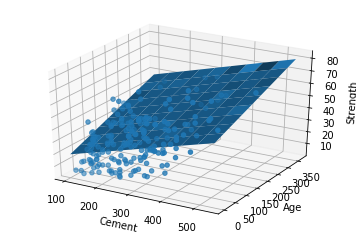

In [77]:
# uncomment for interactivity:
# %matplotlib notebook

x1_lim = np.linspace(min(x_1), max(x_1), 10)
x2_lim = np.linspace(min(x_2), max(x_2), 10)

X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = lin_reg.coef_[0]*X1 + lin_reg.coef_[1]*X2 + lin_reg.intercept_

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(x_1_label)
ax.set_ylabel(x_2_label)
ax.set_zlabel(y_label)

ax.scatter3D(x_1_test, x_2_test, y_test)
surf = ax.plot_surface(X1, X2, Y)

In [78]:
%matplotlib inline

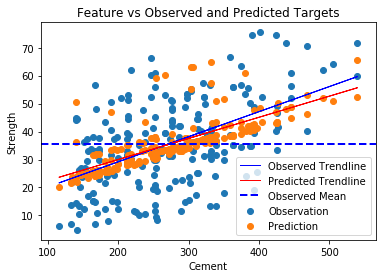

In [79]:
# plot feature vs observed and predicted values for target
fig, ax = plt.subplots()
ax.scatter(x_1_test, y_test, label='Observation')
z = np.polyfit(x_1_test, y_test, 1)
p = np.poly1d(z)
ax.plot(x_1_test, p(x_1_test), "b-", linewidth=1, label='Observed Trendline')
ax.scatter(x_1_test, predictions, label='Prediction')
z = np.polyfit(x_1_test, predictions, 1)
p = np.poly1d(z)
ax.plot(x_1_test, p(x_1_test), "r-", linewidth=1, label='Predicted Trendline')
ax.axhline(y=np.mean(y_test), linewidth=2, linestyle='dashed', c='b', label='Observed Mean')
ax.legend()
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[-1])
ax.set_title('Feature vs Observed and Predicted Targets');

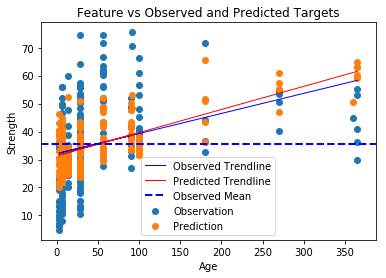

In [80]:
# plot feature vs observed and predicted values for target
fig, ax = plt.subplots()
ax.scatter(x_2_test, y_test, label='Observation')
z = np.polyfit(x_2_test, y_test, 1)
p = np.poly1d(z)
ax.plot(x_2_test, p(x_2_test), "b-", linewidth=1, label='Observed Trendline')
ax.scatter(x_2_test, predictions, label='Prediction')
z = np.polyfit(x_2_test, predictions, 1)
p = np.poly1d(z)
ax.plot(x_2_test, p(x_2_test), "r-", linewidth=1, label='Predicted Trendline')
ax.axhline(y=np.mean(y_test), linewidth=2, linestyle='dashed', c='b', label='Observed Mean')
ax.legend()
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[-1])
ax.set_title('Feature vs Observed and Predicted Targets');

### Calculate R-squared Value
Proportion of target variation explained by the model

In [81]:
# sum of squared errors (observations - predictions)^2
SSE = sum((y_test - predictions)**2)
# sum squared errors from observed mean (observations - observed mean)^2
SST = sum((y_test - np.mean(y_test))**2)
# calculated r-squared score
R_sqr = 1 - SSE/SST
R_sqr

0.3449454006130701

In [82]:
# model r-squared score
lin_reg.score(X_test, y_test)

0.34494540061307033

### Plot of Accuracy

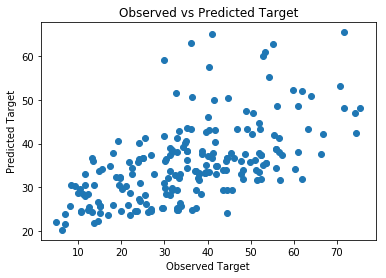

In [83]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.set_xlabel('Observed Target')
ax.set_ylabel('Predicted Target')
ax.set_title('Observed vs Predicted Target');

### Residual Plot
Determine if residuals are normally distributed as assumed by model

In [84]:
# calculate residual values (observations - predictions)
residuals = y_test - predictions

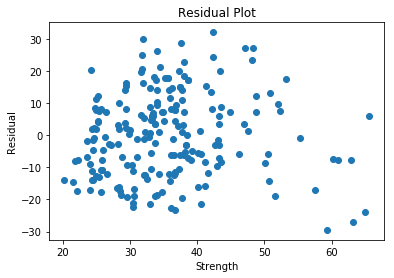

In [85]:
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)
ax.set_xlabel(df.columns[-1])
ax.set_ylabel('Residual')
ax.set_title('Residual Plot');

### Q-Q Plot
Determine if residuals are normally distributed as assumed by model  
Points should mainly fall on the trendline

In [86]:
import scipy.stats as stats

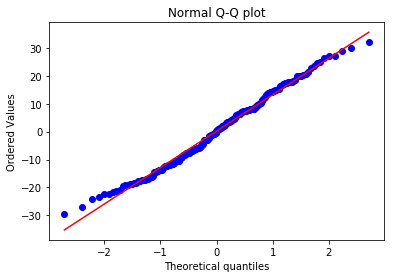

In [87]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

## Feature Selection <a name="feat_sel"></a>
Score features to determine if they have a significant impact on model predictions

In [88]:
from sklearn import feature_selection

In [89]:
# create instance of feature selector
feat_selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')

In [90]:
# fit on training data
feat_selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7efd19304510>)

In [91]:
# features
X.columns

Index(['Cement', 'Age'], dtype='object')

In [92]:
# output scores for each feature
feat_selector.scores_

array([269.19472061, 101.87905754])

In [93]:
pd.DataFrame(feat_selector.scores_, index=X.columns, columns=['Feature Score'])

,Feature Score
Cement,269.194721
Age,101.879058


# Refined Modeling <a name="ref_mod"></a>

In [94]:
# full dataset
df_conc.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Define Variables

In [95]:
# independent (feature) variables
X = df_conc.iloc[:, 0:-1]

In [96]:
# dependent (target) variable
y = df_conc.iloc[:, -1]

## Test/Train Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Transformations

### Normalize

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

### Polynomial

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
poly = PolynomialFeatures(4)
X_train_norm_poly = poly.fit_transform(X_train_norm)
X_test_norm_poly = poly.transform(X_test_norm)

## Modeling

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm_poly, y_train)
lin_reg.score(X_train_norm_poly, y_train)

0.9832765787994403

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
np.mean(cross_val_score(lin_reg, X_train_norm_poly, y_train, cv=10))

-397.2481897619681

In [107]:
lin_reg.score(X_test_norm_poly, y_test)

-25.7337390454956

## Pipeline <a name="pipe"></a>

In [108]:
from sklearn.pipeline import Pipeline

In [109]:
# set pipeline parameters
lr_pipe = Pipeline([
    ('scaler', MinMaxScaler()), # apply normalizer to data
    ('poly', PolynomialFeatures(4)), # calculate polynomial features
    ('model', LinearRegression()) # linear regression modeling
])

In [110]:
# fit model using pipeline parameters
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [111]:
# score pipelined model
lr_pipe.score(X_test, y_test)

-25.7337390454956

## Regularization <a name="reg"></a>
Optimizes feature effects in model  
Introduces penalty for adding features  
Reduces overfitting

In [112]:
from sklearn import linear_model

### Ridge
Adds the L2 norm (square root of the sum of squares) of the coefficients to the cost function

In [113]:
# specify alpha values
# higher alpha values penalize coefficients more
alpha_range = np.linspace(0.0001, 0.1, 50)

In [114]:
# initialize regularized model
LR_ridgecv = linear_model.RidgeCV(alphas=alpha_range, cv=10, scoring='r2')

In [115]:
# fit model on traning data
LR_ridgecv.fit(X_train_norm_poly, y_train)

RidgeCV(alphas=array([0.0001 , 0.00214, 0.00418, 0.00622, 0.00826, 0.01029, 0.01233,
       0.01437, 0.01641, 0.01845, 0.02049, 0.02253, 0.02457, 0.0266 ,
       0.02864, 0.03068, 0.03272, 0.03476, 0.0368 , 0.03884, 0.04088,
       0.04291, 0.04495, 0.04699, 0.04903, 0.05107, 0.05311, 0.05515,
       0.0571...165, 0.08369,
       0.08573, 0.08777, 0.08981, 0.09184, 0.09388, 0.09592, 0.09796,
       0.1    ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='r2', store_cv_values=False)

In [116]:
# score on test data
LR_ridgecv.score(X_test_norm_poly, y_test)

0.8639285666676336

In [117]:
# output best alpha value
LR_ridgecv.alpha_

0.0021387755102040816

### Lasso
Adds the L1 norm (sum of absolute values) of the coefficients to the cost function

In [118]:
# specify alpha values
# higher alpha values penalize coefficients more
alpha_range = np.linspace(0.0001, 0.1, 50)

In [119]:
# initialize regularized model
LR_lassocv = linear_model.LassoCV(alphas=alpha_range, cv=10)

In [120]:
# fit model on training data
LR_lassocv.fit(X_train_norm_poly, y_train)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([0.0001 , 0.00214, 0.00418, 0.00622, 0.00826, 0.01029, 0.01233,
       0.01437, 0.01641, 0.01845, 0.02049, 0.02253, 0.02457, 0.0266 ,
       0.02864, 0.03068, 0.03272, 0.03476, 0.0368 , 0.03884, 0.04088,
       0.04291, 0.04495, 0.04699, 0.04903, 0.05107, 0.05311, 0.05515,
       0.0571...165, 0.08369,
       0.08573, 0.08777, 0.08981, 0.09184, 0.09388, 0.09592, 0.09796,
       0.1    ]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [121]:
# score on test data
LR_lassocv.score(X_test_norm_poly, y_test)

0.8582169706873326

In [122]:
# output best alpha value
LR_lassocv.alpha_

0.0001

### ElasticNet
Combines Lasso and Ridge by adding both the L1 and L2 norm of the coefficients to the cost function

In [123]:
# specify alpha values
# higher alpha values penalize coefficients more
alpha_range = np.linspace(0.0001, 0.1, 50)

In [124]:
# initialize regularized model
LR_elasticcv = linear_model.ElasticNetCV(alphas=alpha_range, cv=10)

In [125]:
# fit model on training data
LR_elasticcv.fit(X_train_norm_poly, y_train)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([0.0001 , 0.00214, 0.00418, 0.00622, 0.00826, 0.01029, 0.01233,
       0.01437, 0.01641, 0.01845, 0.02049, 0.02253, 0.02457, 0.0266 ,
       0.02864, 0.03068, 0.03272, 0.03476, 0.0368 , 0.03884, 0.04088,
       0.04291, 0.04495, 0.04699, 0.04903, 0.05107, 0.05311, 0.05515,
       0.0571...165, 0.08369,
       0.08573, 0.08777, 0.08981, 0.09184, 0.09388, 0.09592, 0.09796,
       0.1    ]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [126]:
# score on test data
LR_elasticcv.score(X_test_norm_poly, y_test)

0.8368123875937423

In [127]:
# output best alpha value
LR_elasticcv.alpha_

0.0001

## Feature Importance <a name="feat_imp"></a>

In [128]:
poly.get_feature_names(X.columns)

['1',
 'Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Cement (component 1)(kg in a m^3 mixture)^2',
 'Cement (component 1)(kg in a m^3 mixture) Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Cement (component 1)(kg in a m^3 mixture) Fly Ash (component 3)(kg in a m^3 mixture)',
 'Cement (component 1)(kg in a m^3 mixture) Water  (component 4)(kg in a m^3 mixture)',
 'Cement (component 1)(kg in a m^3 mixture) Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Cement (component 1)(kg in a m^3 mixture) Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Cement (component 1)(kg in a m^3 mixture) Fine Aggregate (component 7)(kg in a m^3 mixture)'

In [129]:
LR_ridgecv.coef_

array([ 0.00000000e+00,  7.29733586e+01,  3.07752669e+01, -1.73790301e+01,
        1.00155647e+01,  6.97470771e+01, -1.59177000e+01,  2.63319904e+01,
        1.19998198e+02, -7.47027623e+01,  8.87061149e+01,  5.54045876e+01,
       -1.00681125e+01,  8.45014286e+00,  4.98599526e+01,  2.71787398e+01,
        5.65539905e+01,  2.55005861e+00, -2.52927348e+01, -2.27623674e+01,
        4.51506849e+01, -1.19304970e+02,  3.86835973e+01,  8.53595160e+01,
       -6.68427681e+01,  8.42370993e-01, -8.46335438e+00, -7.47338816e+00,
        5.09230754e+01,  4.85475725e+01,  4.48390890e+01, -3.10321908e+01,
        1.78144204e+01, -2.93931800e+01, -6.60267505e+00, -4.26248977e+01,
        9.06431808e+00,  4.55375007e+01,  6.40108163e+01,  3.81654192e+01,
        1.14496016e+01,  2.18290758e+01, -1.27504701e+01,  8.04896968e+01,
       -2.87924299e+02, -4.99031769e+01,  7.54887073e+01,  8.30155361e+00,
       -1.59691241e+01, -5.98351876e+00, -2.32323159e+01, -4.86879767e+00,
       -1.26764027e+01, -

In [130]:
# pair feature names with model coefficients
feat_imp = list(zip(poly.get_feature_names(X.columns), LR_ridgecv.coef_))

In [131]:
# sort features by coefficient absolute value
feat_imp = sorted(feat_imp, key = lambda x: abs(x[1]), reverse=True)
feat_imp[:10]

[('Age (day)^3', 292.138172086265),
 ('Age (day)^2', -287.924298598364),
 ('Superplasticizer (component 5)(kg in a m^3 mixture) Age (day)^2',
  -230.66235212874915),
 ('Age (day)^4', -196.57449584621597),
 ('Fine Aggregate (component 7)(kg in a m^3 mixture) Age (day)^3',
  195.8374219242939),
 ('Coarse Aggregate  (component 6)(kg in a m^3 mixture) Age (day)^3',
  186.75562895768775),
 ('Blast Furnace Slag (component 2)(kg in a m^3 mixture) Age (day)^2',
  -185.75656965580959),
 ('Blast Furnace Slag (component 2)(kg in a m^3 mixture) Age (day)^3',
  179.7878373753097),
 ('Fine Aggregate (component 7)(kg in a m^3 mixture) Age (day)^2',
  -155.8911538148212),
 ('Cement (component 1)(kg in a m^3 mixture) Age (day)^2',
  -150.96197739348693)]